# Assignment 2
Submitted by: Abainza, Jugalbot

### Bar charts

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly.graph_objects as go
import networkx as nx



In [2]:
df_bar = pd.read_csv("bar_assignment.csv")
df_bar.info

<bound method DataFrame.info of    LABEL  COUNT
0      D      1
1      D      1
2      D      0
3      D      1
4      F      1
5      F      1
6      F      0
7      F      0
8      I      1
9      N      1
10     N      1
11     N      0
12     S      1
13     S      0
14     S      1
15     S      1
16     S      1
17     S      0
18     S      0
19     S      0
20     S      1
21     S      0>

In [3]:
df_bar["COUNT"] = df_bar["COUNT"].map({1: "Yes", 0: "No"})
counts_per_label = df_bar.groupby('LABEL')['COUNT'].value_counts().unstack(fill_value=0)
counts_per_label

COUNT,No,Yes
LABEL,,
D,1,3
F,2,2
I,0,1
N,1,2
S,5,5


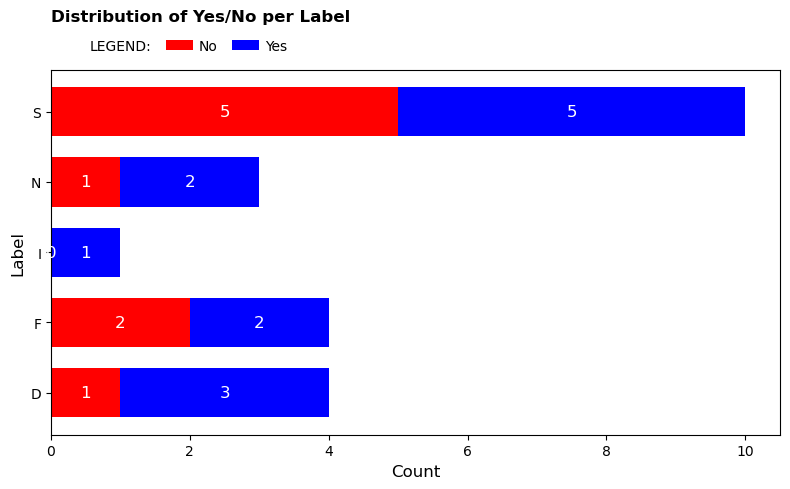

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

counts_per_label[['No','Yes']].plot(
    kind='barh',
    stacked=True,
    color=['red', 'blue'],
    width=0.7,
    ax=ax
)

ax.set_title("Distribution of Yes/No per Label", fontweight='semibold', loc="left", pad=35)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Label", fontsize=12)

legend_elements = [
    Patch(facecolor='none', edgecolor='none', label='LEGEND:'),
    Patch(facecolor='red', label='No'),
    Patch(facecolor='blue', label='Yes')
]

ax.legend(handles=legend_elements, loc='upper left', borderaxespad=0, frameon=False, ncol=3, bbox_to_anchor=(0, 1.1), columnspacing=1, handlelength=2, handletextpad=0.4)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f', color='white', fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
fig.savefig("stacked_chart.png", dpi=300, bbox_inches='tight')


## Sankey

In [8]:
df= pd.read_csv("sankey_assignment.csv")
df.info

<bound method DataFrame.info of   LABEL  PS  OMP  CNP  NRP  NMCCC  PEC  NCDM  RGS  Reg  Aca  Oth
0     S   3    4    1    1      0    0     1    1    2    7    1
1     F   0    1    2    1      1    0     0    1    2    2    0
2     D   1    1    2    0      0    0     1    1    1    3    1
3     N   1    1    1    1      0    1     1    0    2    2    1
4     I   0    1    0    0      0    0     0    0    0    1    0>

In [9]:
sources = ["NMCCC", "CNP", "OMP", "NRP", "RGS", "PS", "NCDM", "PEC"]
finds = df["LABEL"].unique().tolist()
destinations = ["F", "I", "S", "D", "N", "Aca", "Reg", "Oth"]

sources = list(df.columns[1:-3])  # ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
finds = list(df['LABEL'])          # ['S', 'F', 'D', 'N', 'I']
destinations = list(df.columns[-3:])  # ['Reg', 'Aca', 'Oth']

In [10]:
node_colors = {
    'NMCCC': '#FF69B4',  # Pink
    'CNP': '#00CED1',    # Turquoise
    'OMP': '#FA8072',    # Salmon
    'NRP': '#DDA0DD',    # Plum
    'RGS': '#90EE90',    # Light Green
    'PS': '#87CEEB',     # Sky Blue
    'NCDM': '#FFB6C1',   # Light Pink
    'PEC': '#20B2AA',    # Teal
    'F': '#FFD700',      # Gold
    'I': '#98FB98',      # Pale Green
    'S': '#FF69B4',      # Pink
    'D': '#4169E1',      # Royal Blue
    'N': '#FA8072',      # Salmon
    'Aca': '#FFA07A',    # Light Salmon
    'Reg': '#DDA0DD',    # Plum
    'Oth': '#00CED1'     # Turquoise
}

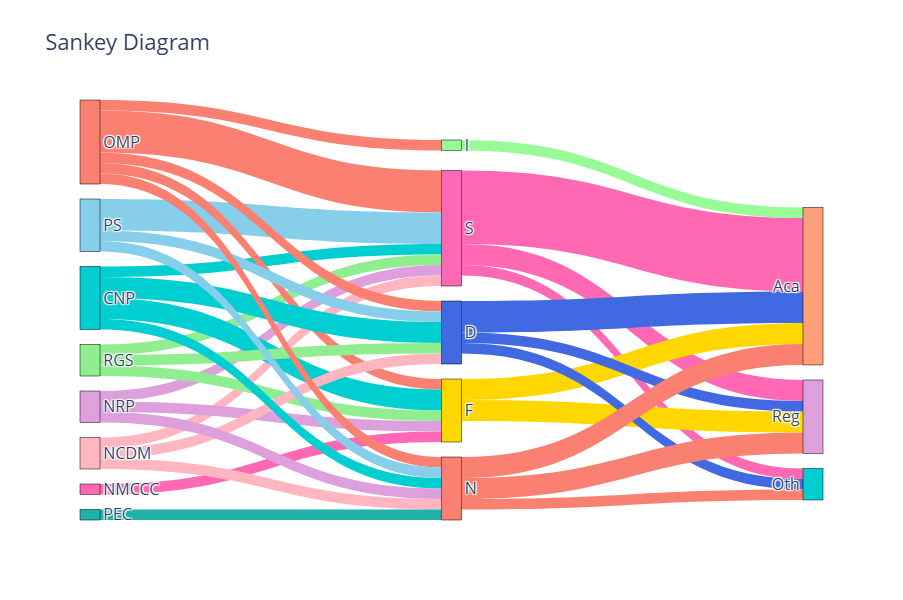

In [15]:
source_totals = {}
for source in sources:
    source_totals[source] = df[source].sum()

sources = sorted(source_totals.keys(), key=lambda x: source_totals[x], reverse=True)

nodes = sources + finds + destinations
node_indices = {name: i for i, name in enumerate(nodes)}

links = []
colors = []

for _, row in df.iterrows():
    for source in sources:
        value = row[source]
        if value > 0:
            links.append((source, row['LABEL'], value))
            colors.append(node_colors[source]) 

for _, row in df.iterrows():
    for destination in destinations:
        value = row[destination]
        if value > 0:
            links.append((row['LABEL'], destination, value))
            colors.append(node_colors[row['LABEL']]) 

sankey_links = {
    "source": [node_indices[src] for src, tgt, val in links],
    "target": [node_indices[tgt] for src, tgt, val in links],
    "value": [val for src, tgt, val in links],
    "color": colors
}

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=[node_colors[node] for node in nodes]  # Set node colors
    ),
    link=sankey_links
))

fig.update_layout(
    title_text="Sankey Diagram", 
    font_size=16,
    height=600
)

fig.show()

In [16]:
fig.write_image("sankey_graph.png", width=1200, height=600)

## Network Graph

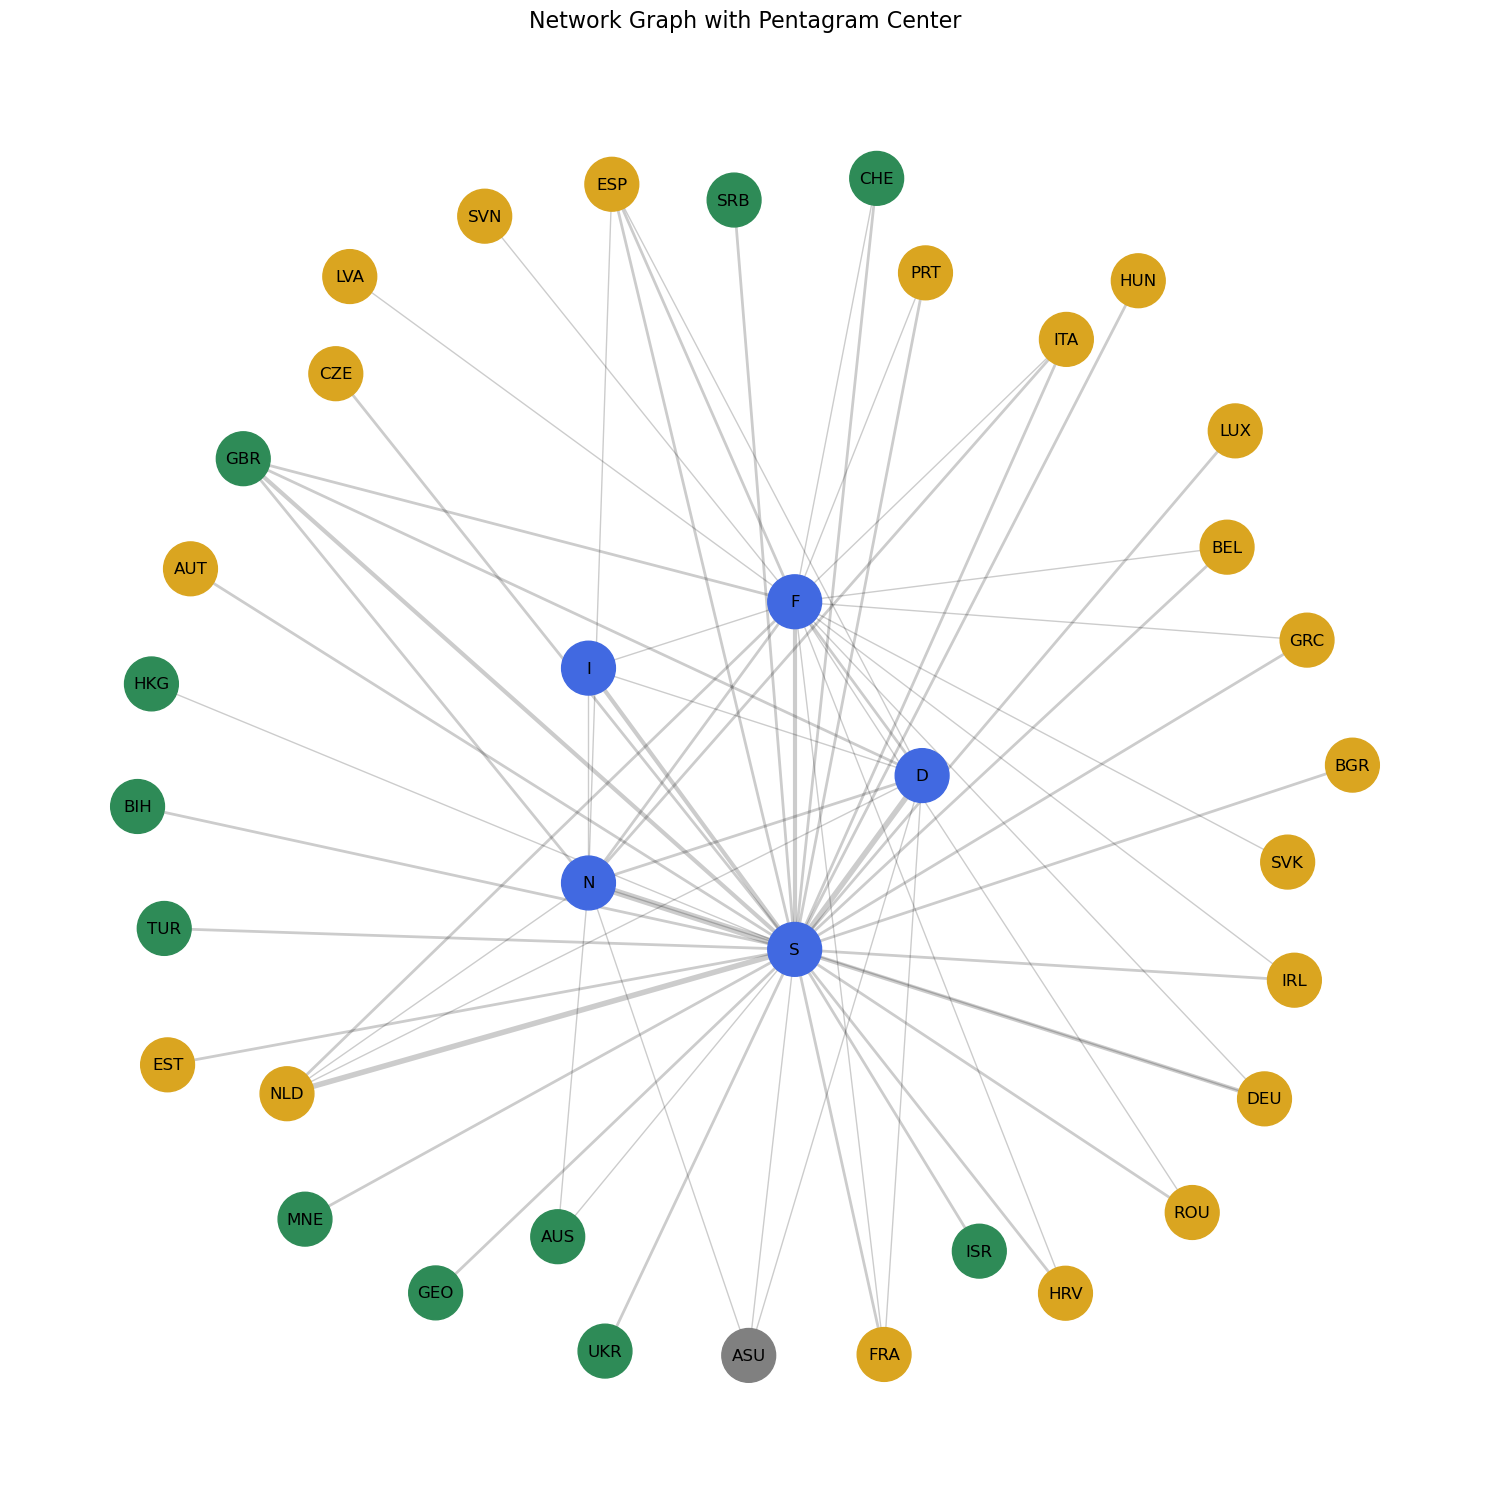

In [20]:
data = pd.read_csv("networks_assignment.csv")

G = nx.Graph()

headers = data.columns
for idx, row in data.iterrows():
    source = row['LABELS']
    for col in headers[1:]:  # Skip the 'LABELS' column
        value = row[col]
        if value > 0:
            G.add_edge(source, col, weight=float(value))

blue_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 
                'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

color_map = []
for node in G.nodes():
    if node in blue_nodes:
        color_map.append('#4169E1')
    elif node in green_nodes:
        color_map.append('#2E8B57')
    elif node in yellow_nodes:
        color_map.append('#DAA520')
    else:
        color_map.append('gray')

# Set up the plot
plt.figure(figsize=(15, 15))

pentagon_radius = 0.3
pentagon_angles = np.linspace(0, 2*np.pi, len(blue_nodes), endpoint=False)
pentagon_pos = {node: (pentagon_radius * np.cos(angle), pentagon_radius * np.sin(angle)) 
               for node, angle in zip(blue_nodes, pentagon_angles)}

other_nodes = [n for n in G.nodes() if n not in blue_nodes]
other_pos = nx.spring_layout(G.subgraph(other_nodes), k=0.3, iterations=50)

pos = {**pentagon_pos, **other_pos}

nx.draw_networkx_edges(G, pos, alpha=0.2, width=[G[u][v]['weight'] for u, v in G.edges()])
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=1500)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Network Graph with Pentagram Center", pad=20, size=16)
plt.axis('off')

plt.tight_layout()

# Show the plot
plt.show()

In [21]:
plt.savefig("network_graph.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>